<a href="https://colab.research.google.com/github/codekennML/ExploratoryDataAnalysis/blob/main/Linear_Regression_EDA_on_Housing_Prices_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Required Dependencies and libraries 

In [ ]:
import numpy as np                                          #Array manipulation 
import pandas as pd                                         # DataFrame manipulation 
import matplotlib.pyplot as plt                             # Data Visualization 
import seaborn as sns                                        #data Visualization
import missingno as msno                                     #Missing values visualization

%matplotlib inline 

Loading the dataframe and setting the display options for the libraries 

In [ ]:
sns.set_style('whitegrid')
pd.set_option('display.max_columns',None)
cmap = 'CMRmap_r'

df = pd.read_csv('/content/train.csv')


In [ ]:
!pip install feature_engine

Performing Descriptive data analysis on the Dataset 

In [ ]:
# Lets Obtain the dimension of the dataset and see what it looks like 
df.shape , df.columns, 




((1460, 81),
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
      

Our Dataset set has 1460 Entries and 81 rows and we will be looking to predict the sales price of the houses given the features therein 

In [ ]:
missing  =  df.isnull().sum()

In [ ]:
df.isnull().sum().sort_values(ascending =False)/len(df)

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 81, dtype: float64

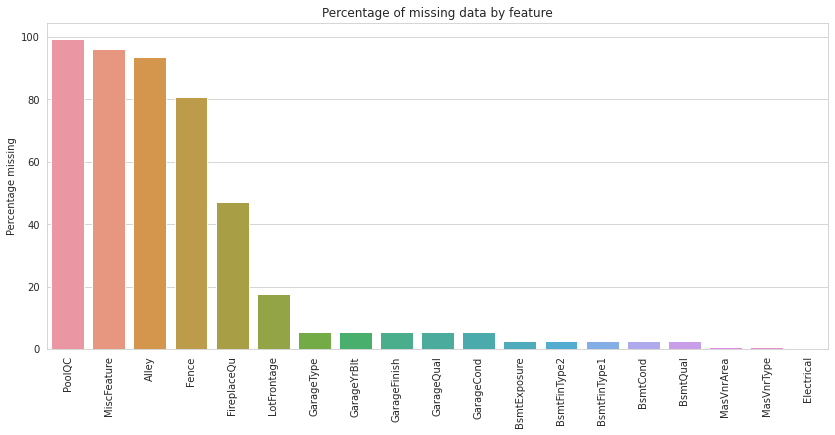

In [ ]:
df_na = (df.isnull().sum() / len(df)) * 100

# drop columns without missing values and sort
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)
df_na
# create plot
f, ax = plt.subplots(figsize=(14, 6))
plt.xticks(rotation='90')
sns.barplot(x=df_na.index, y=df_na)
ax.set(title='Percentage of missing data by feature', ylabel='Percentage missing')
plt.show()

In [ ]:
total_df =  np.product(df.shape)
total_miss = missing.count()

percent_df_missing = ( total_miss /total_df)*100
total_miss

81

Lets see how many duplicate columns or null values we have in each column or series of the dataset

In [ ]:
Hzvm7HbMKGGdMsj3apFVmgNJz1EtVcGy9Cu4Z1EMwpA2 
df.duplicated().sum(),  df.isnull().sum()


(0, Id                 0
 MSSubClass         0
 MSZoning           0
 LotFrontage      259
 LotArea            0
                 ... 
 MoSold             0
 YrSold             0
 SaleType           0
 SaleCondition      0
 SalePrice          0
 Length: 81, dtype: int64)

There are no duplicate values in our dataframe but there are missing values in some of the columns 
Lets plot the percentage of the missing values to see its distribution 

In [ ]:
!pip install missingno

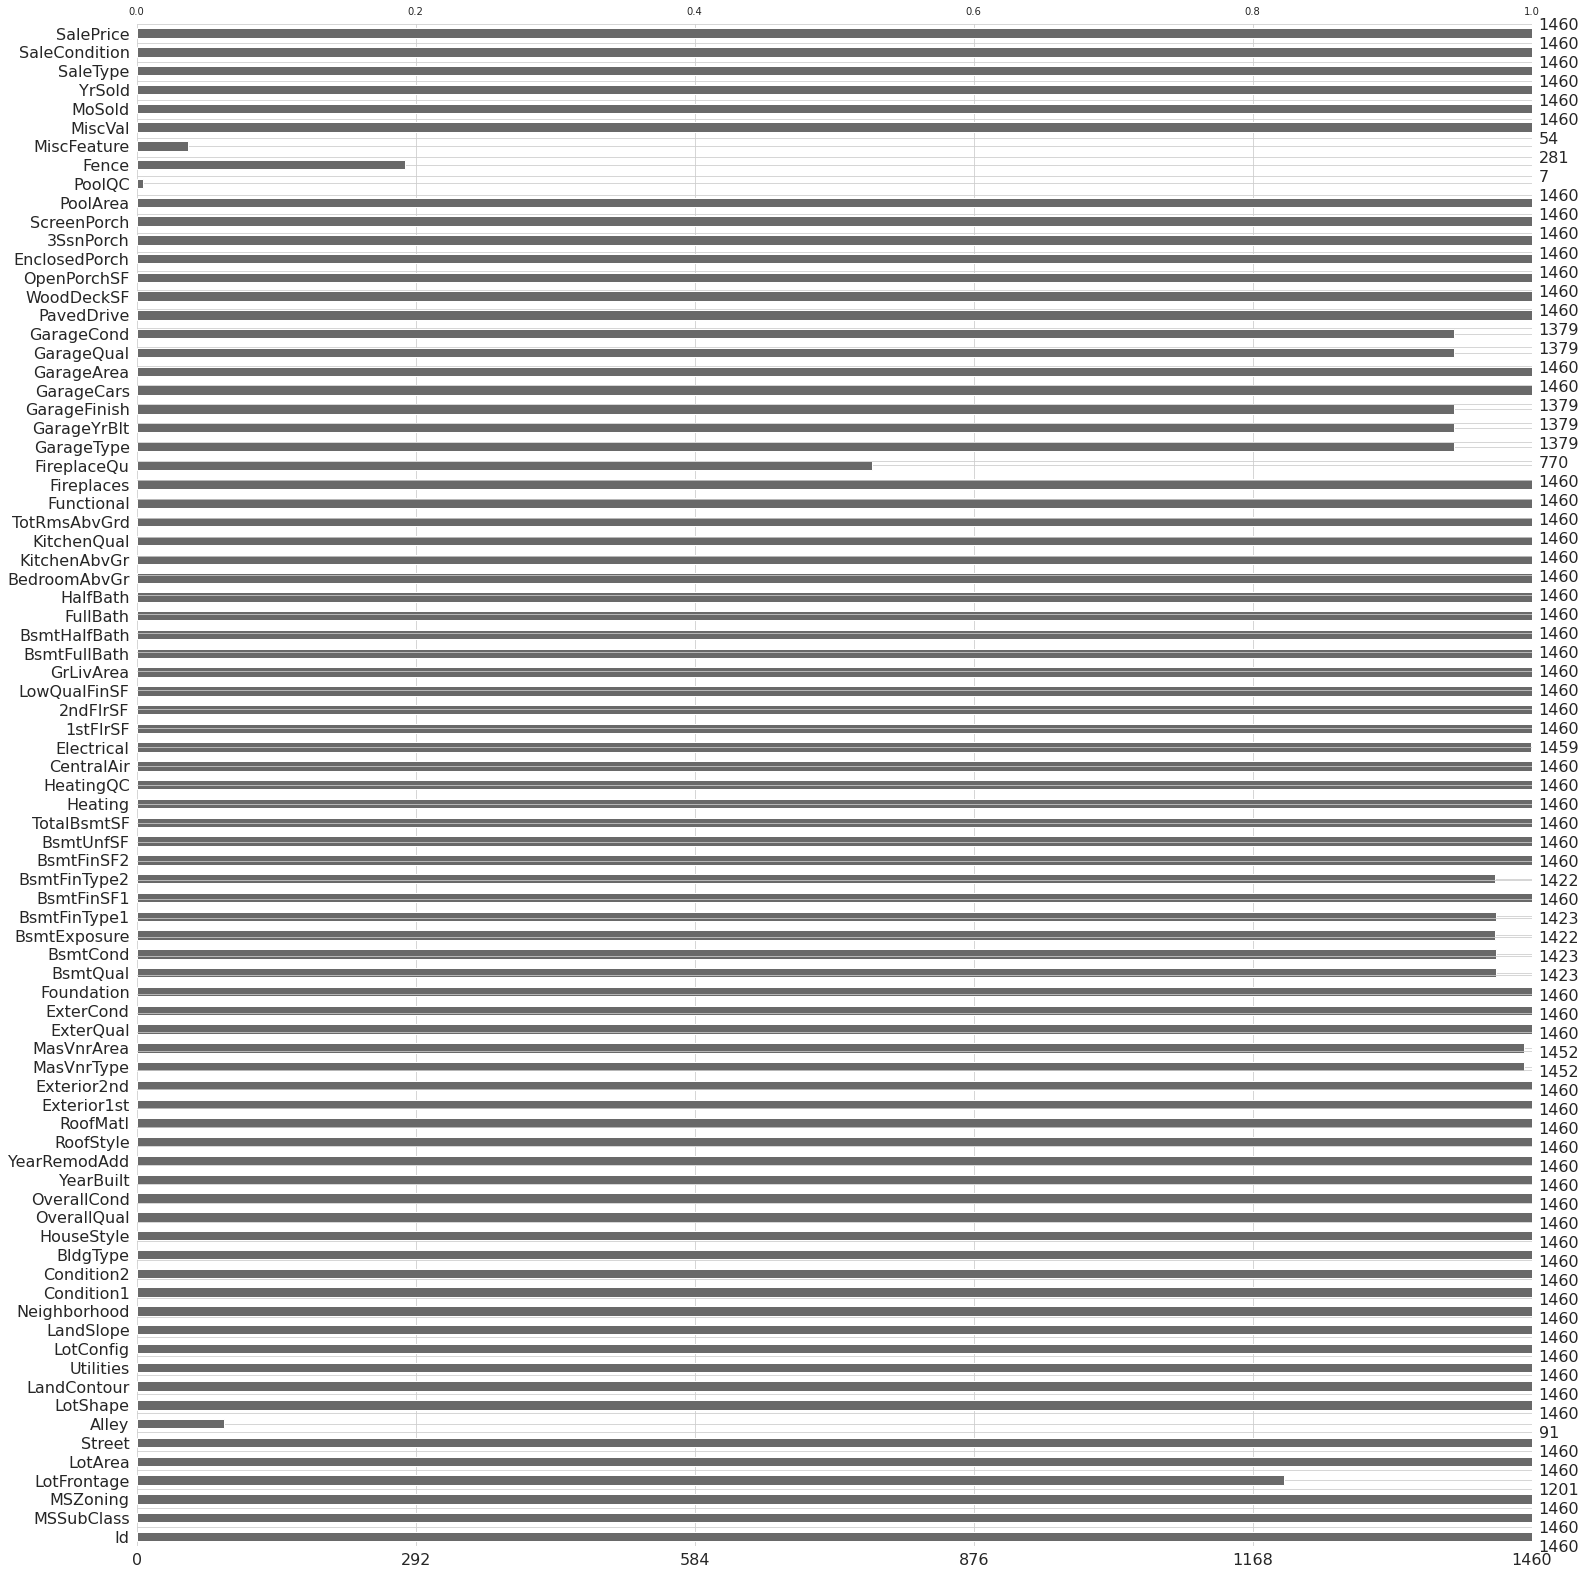

In [ ]:
msno.bar(df)

In [ ]:
#Find all columns with atleast one missing values 
feature =  [feature for feature in df.columns if df[feature].isnull().sum() > 0 ]
for feature in feature:
 percent_missing = np.round(df[feature].isnull().sum() * 100 / len(df[feature]),2)
 print('The Percentage of Missing Values in {} is  {}% '.format(feature, percent_missing) )
 #colors = sns.color_palette('pastel')[0:5]
 #plt.pie(percent_missing,colors =  colors ,  labels =labels,autopct='%.0f%%')
 


The Percentage of Missing Values in LotFrontage is  17.74% 
The Percentage of Missing Values in Alley is  93.77% 
The Percentage of Missing Values in MasVnrType is  0.55% 
The Percentage of Missing Values in MasVnrArea is  0.55% 
The Percentage of Missing Values in BsmtQual is  2.53% 
The Percentage of Missing Values in BsmtCond is  2.53% 
The Percentage of Missing Values in BsmtExposure is  2.6% 
The Percentage of Missing Values in BsmtFinType1 is  2.53% 
The Percentage of Missing Values in BsmtFinType2 is  2.6% 
The Percentage of Missing Values in Electrical is  0.07% 
The Percentage of Missing Values in FireplaceQu is  47.26% 
The Percentage of Missing Values in GarageType is  5.55% 
The Percentage of Missing Values in GarageYrBlt is  5.55% 
The Percentage of Missing Values in GarageFinish is  5.55% 
The Percentage of Missing Values in GarageQual is  5.55% 
The Percentage of Missing Values in GarageCond is  5.55% 
The Percentage of Missing Values in PoolQC is  99.52% 
The Percentage

Selecting and differentiating the columns into data types, Numerical and Categorical 

In [ ]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [ ]:
cat_vars =  df.select_dtypes(include='object')
len(cat_vars.columns)

43

In [ ]:
num_vars  =  df.select_dtypes(include='number')
len(num_vars.columns)

38

In [ ]:
total =  df.isnull().sum().sort_values(ascending =  False)
percent =(df.isnull().sum() * 100 / len(df)).sort_values(ascending = False)

df_missing =  pd.concat([total,percent], axis = 1, keys=['Total', 'Percent']).sort_index(ascending=False)
df_missing


,Total,Percent
YrSold,0,0.000000
YearRemodAdd,0,0.000000
YearBuilt,0,0.000000
WoodDeckSF,0,0.000000
Utilities,0,0.000000
...,...,...
BedroomAbvGr,0,0.000000
Alley,1369,93.767123
3SsnPorch,0,0.000000
2ndFlrSF,0,0.000000


Now that we are done seperating the dataframe into numerical and categorical 
Lets analyse our target variable and see its distribution 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


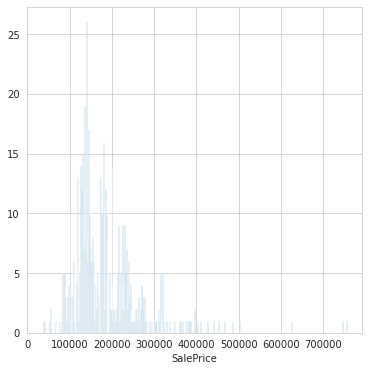

In [ ]:
# We want to check the type of distribution of the target variable, SalePrice in this instance 
#Take a quick displot of the columns 
fig =  plt.figure(figsize=(6,6))
#sns.displot(df.SalePrice)
sns.distplot(df.SalePrice, bins = 1000, kde =  False)



Observation 1 : The sale Price is right skewed meaning we have quite a few outliers








Lets see the relationship of the numerical variables , How are they even distributed ?

In [ ]:
#num_vars.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

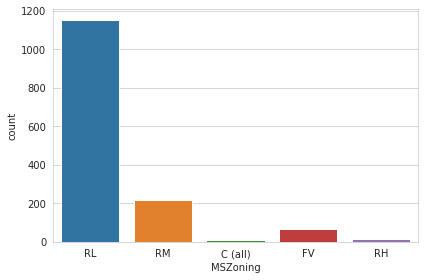

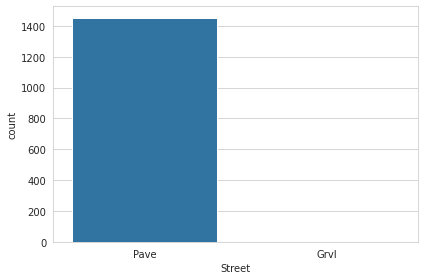

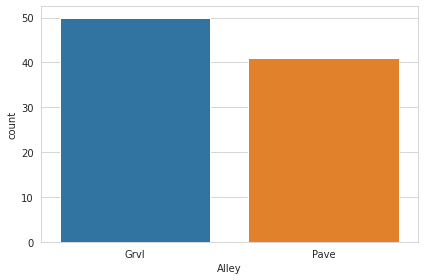

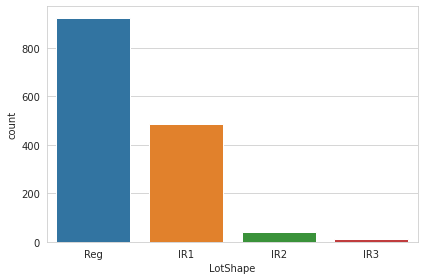

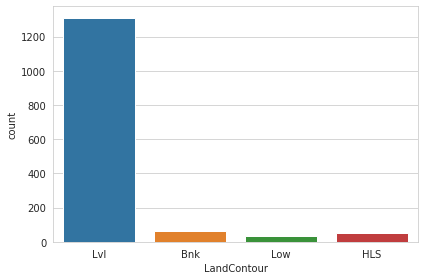

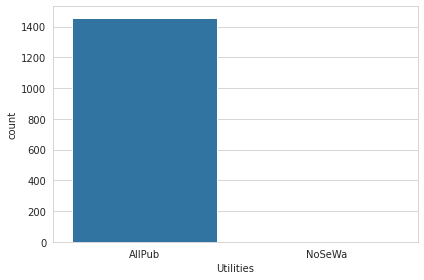

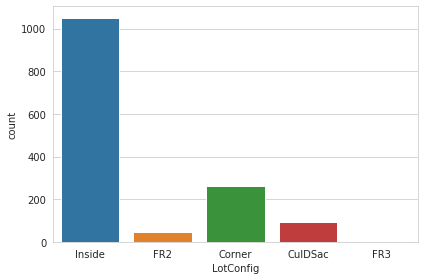

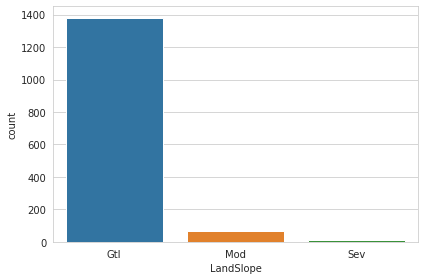

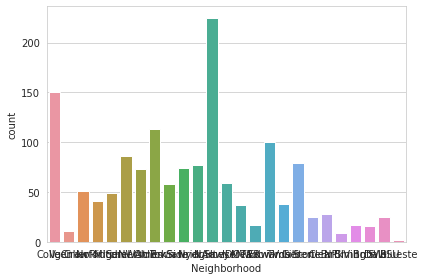

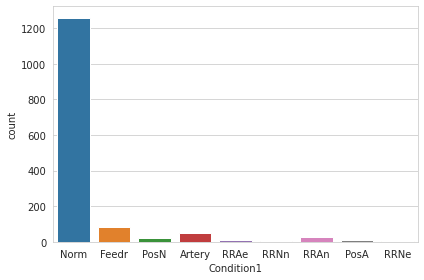

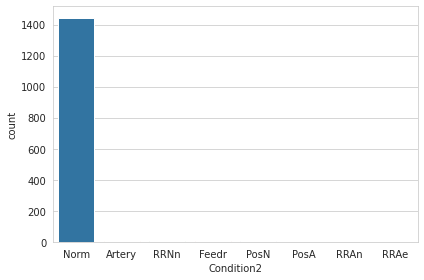

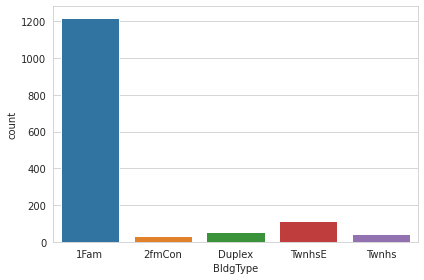

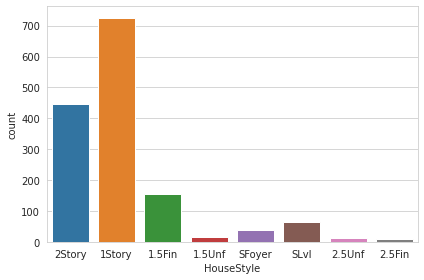

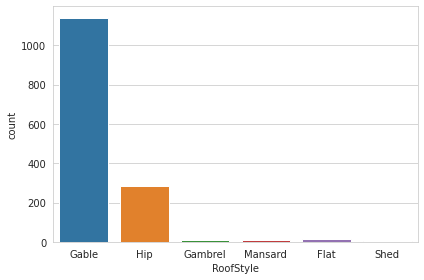

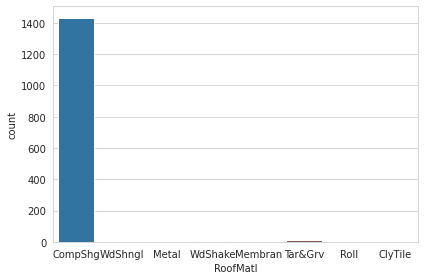

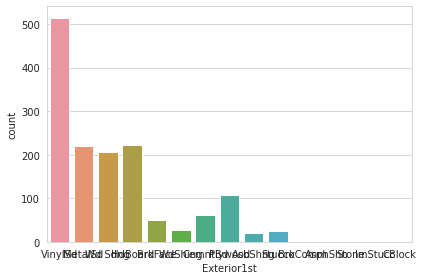

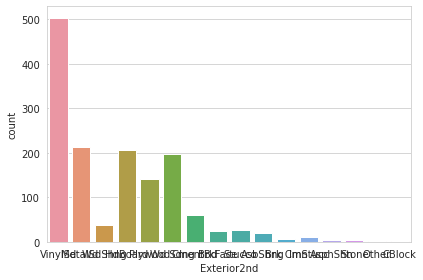

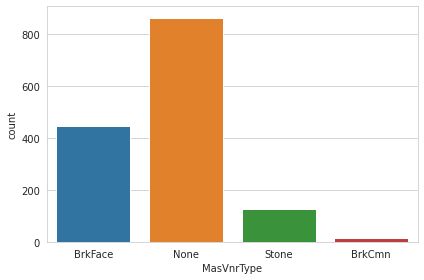

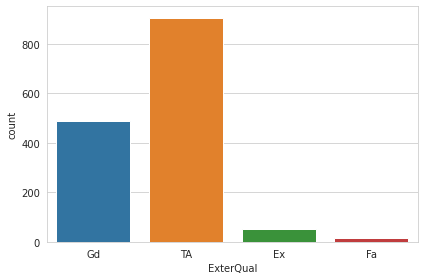

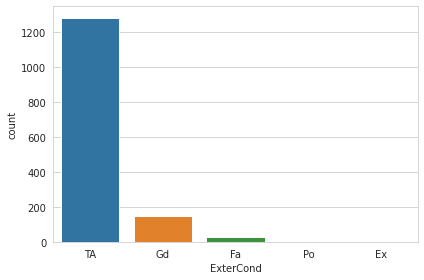

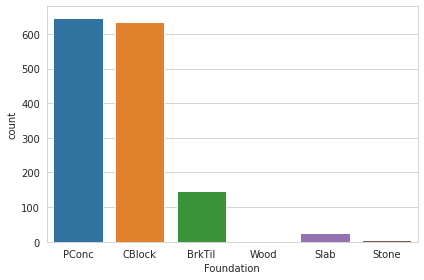

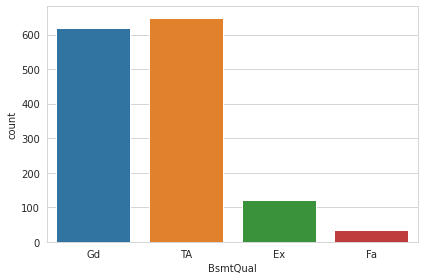

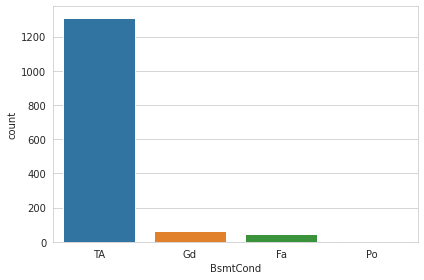

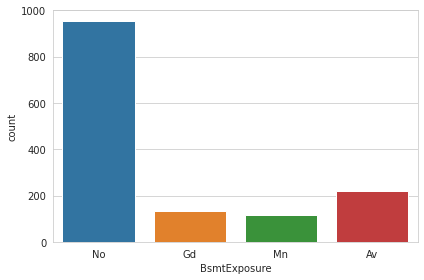

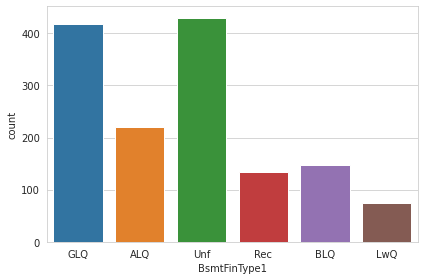

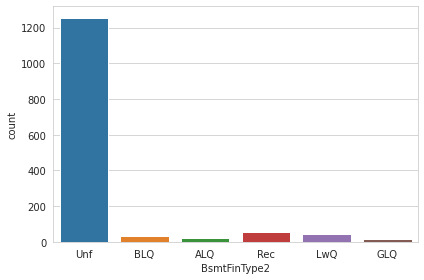

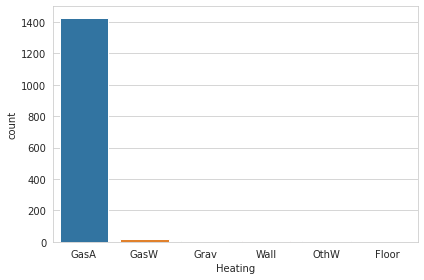

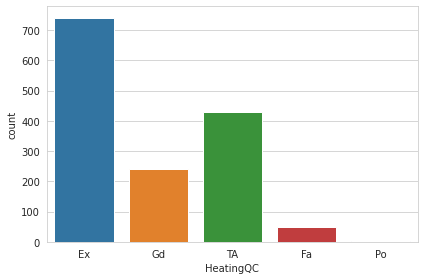

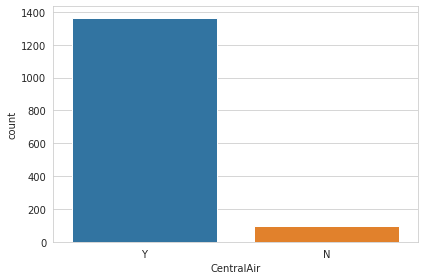

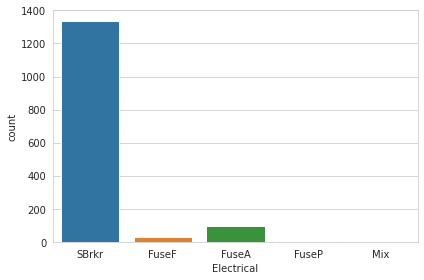

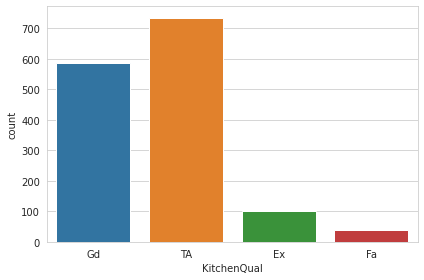

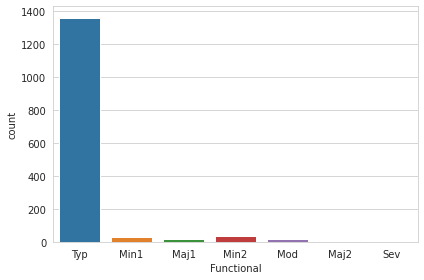

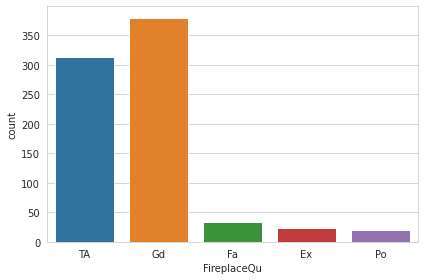

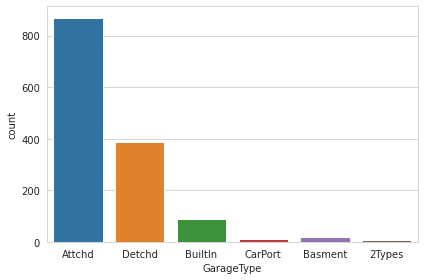

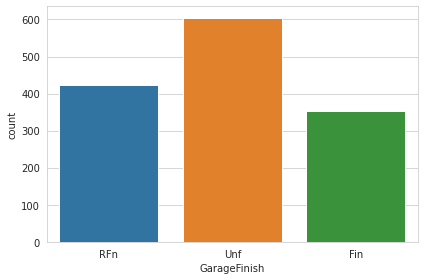

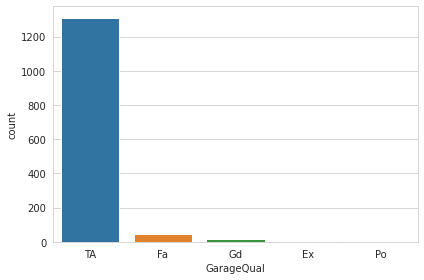

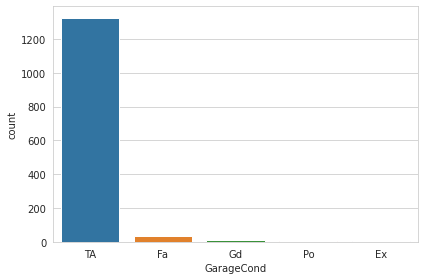

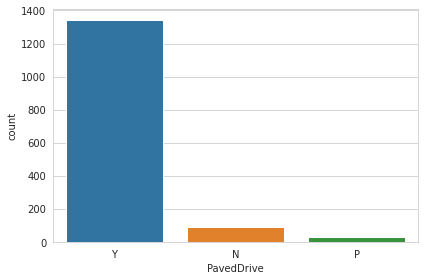

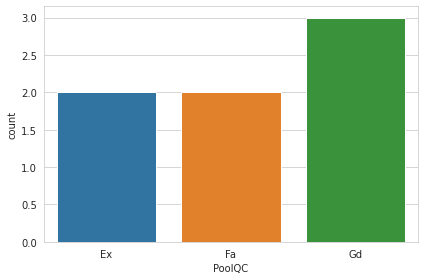

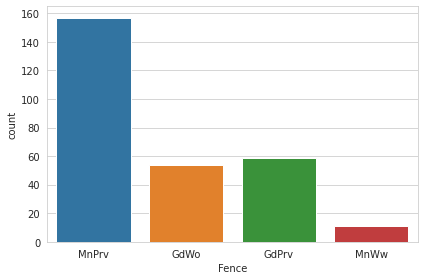

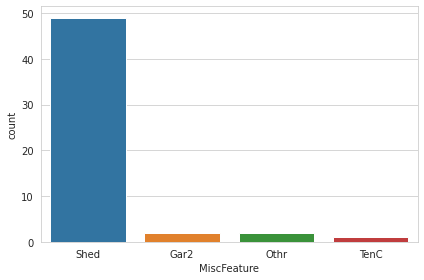

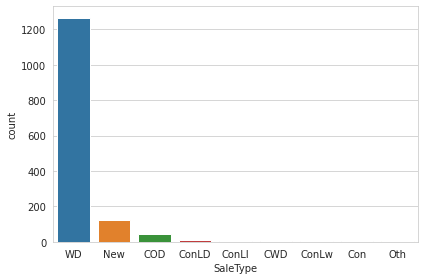

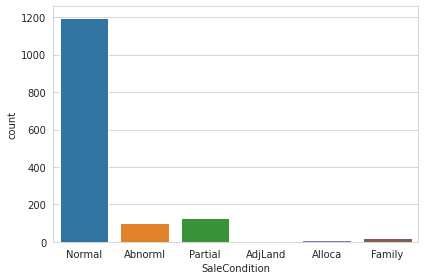

In [ ]:
for i, col in enumerate(cat_vars.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df);
    plt.tight_layout();


# n = len(cat_vars)
# fig,ax = plt.subplots(n,1, figsize=(6,n*2), sharex=True)
# for i in range(n):
#     plt.sca(ax[i])
#     col = cat_vars.columns[i]
#     sns.countplot(cat_vars[col].values)
#     ylabel(col);

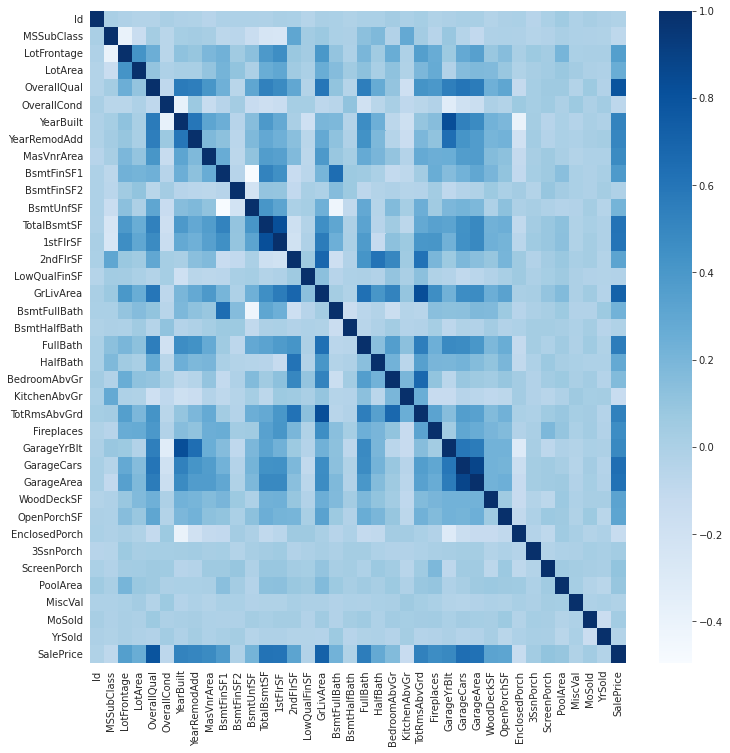

In [ ]:
fig = plt.figure(figsize=(12,12) )
corr =  num_vars.corr()
sns.heatmap(corr, cmap = 'Blues')

In [ ]:
# sns.regplot(y = df.SalePrice, x =  df.OverallQual, data = df)

In [ ]:
#Lets evaluate the dataset column by column
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
corr = df.corr()
type(corr)
    # for i, col in enumerate(cat_vars.columns):
    # plt.figure(i)
    # sns.countplot(x=col, data=df);
    # plt.tight_layout();

pandas.core.frame.DataFrame

In [ ]:
corr['SalePrice'] 


Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [ ]:
cor = df.corr().abs()

cor_target = abs(cor["SalePrice"])
#Selecting highly correlated features
relevant_features = cor_target[(cor_target>0.35)]
relevant_features

LotFrontage     0.351799
OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
BsmtFinSF1      0.386420
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [ ]:
#Grab columns with a correlation greater than 40%
columns =  [cols for cols in df.columns if cols in relevant_features]
print(columns)

['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [ ]:

corr2  = df[columns].drop(columns = ['SalePrice']).corr() 

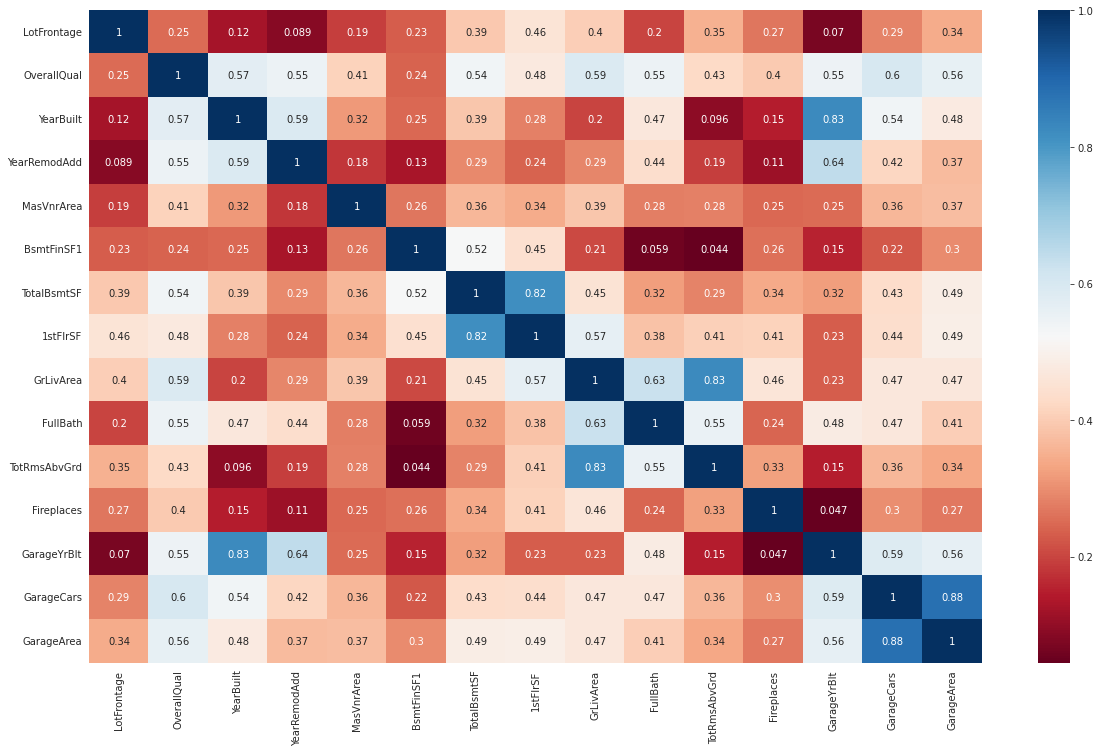

In [ ]:
figure  = plt.figure(figsize=(20,12))
sns.heatmap(corr2, annot = True , cmap = 'RdBu')

In [ ]:
df_try = df[columns].drop(columns  = ['SalePrice']).fillna(0)
df_sale = df['SalePrice']

In [ ]:
df_sale

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [ ]:

def correlation(dataset, threshold):
    col_corr = [] # Set of all the names of deleted columns
    corr_matrix = dataset.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold):
                colname =  [corr_matrix.columns[i], corr_matrix.columns[j]]
                              # getting the name of column
             #   colname2 = corr_matrix.columns[j]
                col_corr.append(colname)
    return col_corr


In [ ]:
# def correlation(dataset, threshold):
#   corr_matrix =  dataset.corr().abs()
#   upper_half = corr_matrix.where((np.triu(np.ones(corr_matrix.shape), k=1) + np.tril(np.ones(corr_matrix.shape), k=-1)).astype(bool))
#   corr_beyond_threshold  = [column for column in upper_half.columns if any(upper_half[column] > threshold)]
#   return corr_beyond_threshold

In [ ]:
features_corr =  correlation(df_try, 0.7)
features_corr


[['1stFlrSF', 'TotalBsmtSF'],
 ['TotRmsAbvGrd', 'GrLivArea'],
 ['GarageArea', 'GarageCars']]

In [ ]:
print(features_corr)

[['1stFlrSF', 'TotalBsmtSF'], ['TotRmsAbvGrd', 'GrLivArea'], ['GarageArea', 'GarageCars']]


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor


features =  ExtraTreesRegressor(n_estimators =5 , criterion = 'mse', max_depth = 10)
features.fit(df_try,df_sale )

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


ExtraTreesRegressor(criterion='mse', max_depth=10, n_estimators=5)

In [ ]:
features.feature_importances_

array([0.00624659, 0.30707391, 0.01446823, 0.02963746, 0.00963096,
       0.03136009, 0.029871  , 0.02840841, 0.13874523, 0.07472633,
       0.01080291, 0.04155691, 0.01249385, 0.15134006, 0.11363807])

In [ ]:
X =  pd.Series(features.feature_importances_ , index = df_try.columns, name = 'Importance').sort_values(ascending =  False)


In [ ]:
X

OverallQual     0.307074
GarageCars      0.151340
GrLivArea       0.138745
GarageArea      0.113638
FullBath        0.074726
Fireplaces      0.041557
BsmtFinSF1      0.031360
TotalBsmtSF     0.029871
YearRemodAdd    0.029637
1stFlrSF        0.028408
YearBuilt       0.014468
GarageYrBlt     0.012494
TotRmsAbvGrd    0.010803
MasVnrArea      0.009631
LotFrontage     0.006247
Name: Importance, dtype: float64

In [ ]:
df2

,0,1
0,YearRemodAdd,0.010784
1,YearBuilt,0.347362
2,TotalBsmtSF,0.088850
3,TotRmsAbvGrd,0.047347
4,OverallQual,0.016427
5,MasVnrArea,0.029108
6,LotFrontage,0.027211
7,GrLivArea,0.087180
8,GarageYrBlt,0.133818
9,GarageCars,0.033992
